# The Second Villain: Feature Leakage

The aim of train-test split and cross-validation is to make sure that the model is tested on data about which it has absolutely no information during training.
Absolutely no information.

But, unfortunately, information can easily leak, especially if we already have access to the testing data at the time of training, as in the case of cross-validation.

The most typical form of information leakage is employing a common preprocessing step on all features that utilizes information from all subjects (both train and test).

A simplistic example is feature standardization, i.e. converting the features to zero mean and unique variance. As several [machin learning models](../4_reducing_complexity/index.md) are sensitive to the magnitude of the features, this is a common step in many predictive modelling pipelines.

$$
f_{std} = \frac{f-\mu_f}{\sigma_f}
$$

In case features are standardized all together, i.e before the train-test split or outside of the cross-validation loop, we end up with feature leakage.
Namely, features values of subjects from the training set will be standardized with the $\mu$ and $\sigma$ values computed on all subjects, **including subjects from the training set**

Let's quickly illustrate the problem with some code:

In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import LeaveOneOut
import seaborn as sns

MAE =  28.424867768992854 years


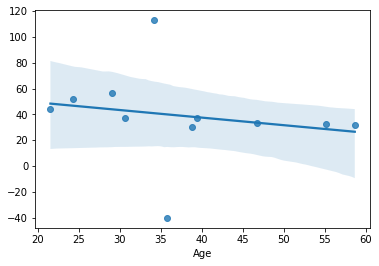

In [18]:
df = pd.read_csv("https://raw.githubusercontent.com/pni-lab/predmod_lecture/master/ex_data/IXI/ixi.csv").loc[:10, :]

# here we simulate random features - guaranteed to be independent of the target
rng = np.random.default_rng(seed = 42)
df_random = pd.DataFrame(rng.normal(loc=0, scale=1, size=(len(df), 5)))
features = df_random.columns
target = 'Age'
df_random[target] = df[target]

#######################################################################################################
## here we standardize the features *globally*, before the train test split, to demonstrate leakage
# DO NOT TRY THIS AT HOME
df_random.loc[:, features] = (df_random.loc[:, features] - df_random.loc[:, features].mean()) / df_random.loc[:, features].std()
########################################################################################################

cv_predictions = cross_val_predict(estimator=LinearRegression(), y=df_random[target], X=df_random[features], cv=LeaveOneOut())
sns.regplot(x=df_random[target], y=cv_predictions)
print('MAE = ', mean_absolute_error(y_true=df_random[target], y_pred=cv_predictions), 'years')

:::{seealso}
https://scikit-learn.org/stable/modules/preprocessing.html
:::